In [1]:
import os,sys
from os import listdir
from os.path import isfile, join

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import numpy as np
from numpy import linalg
import skimage.util
import scipy.ndimage.filters
import scipy.misc
import scipy.io
from scipy import stats

import utils

In [2]:
def reg_loss_clean(y_true, y_pred):
    reg = 10**3
    return reg * keras.losses.mean_squared_error(y_true, y_pred)
def reg_loss_dist(y_true, y_pred):
    reg = 10**5
    return reg * keras.losses.mean_squared_error(y_true, y_pred)

In [3]:
from keras.models import load_model
autoencoder = load_model('my_models/cdA_gblur.h5', custom_objects={'reg_loss_clean': reg_loss_clean,
                                                                   'reg_loss_dist': reg_loss_dist})

Using TensorFlow backend.


Fontconfig warning: ignoring UTF-8: not a valid region tag



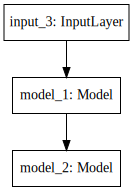

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [23]:
from keras import backend as K
layer_dict = dict([(layer.name, layer) for layer in autoencoder.layers])
model1 = layer_dict['model_1']
model1_layers = dict([(layer.name, layer) for layer in model1.layers])
model2 = layer_dict['model_2']
model2_layers = dict([(layer.name, layer) for layer in model2.layers])

model1_layers['conv2d_1'].output.shape

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(16)])

In [18]:
from keras import backend as K
layer_dict = dict([(layer.name, layer) for layer in autoencoder.layers])
model1 = layer_dict['model_1']
model1_layers = dict([(layer.name, layer) for layer in model1.layers])
model2 = layer_dict['model_2']
model2_layers = dict([(layer.name, layer) for layer in model2.layers])
get_layer = K.function([model1_layers['input_1'].input],
                       [model1_layers['conv2d_1'].output])

In [9]:
from keras import backend as K
layer_dict = dict([(layer.name, layer) for layer in autoencoder.layers])
get_hidden = K.function([layer_dict['input_1'].input],
                        [layer_dict['max_pooling2d_2'].output])

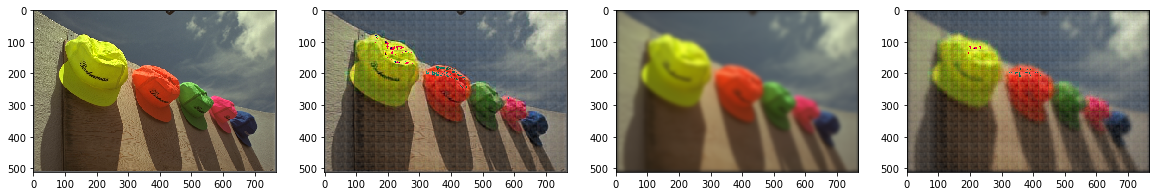

In [10]:
################################ Reconstruction ##############################
# img 162, 42, 36, 132
datadir = '/data2/rajeev/dA_IQA/data/LIVE/gblur/'
% matplotlib inline
# Clean Image
f = datadir + 'img' + str(163) + '.bmp'
Iclean = mpimg.imread(f)
Pclean = utils.getPatchesDict(Iclean, psize=[32, 32], noPatches=4000, entropy_th=1.0, stride=[32, 32])

f = datadir + 'img' + str(70) + '.bmp'
Idist = mpimg.imread(f)
Pdist = utils.getPatchesDict(Idist, psize=[32, 32], noPatches=4000, entropy_th=1.0, stride=[32, 32])

clean_recon = autoencoder.predict([Pclean])
dist_recon = autoencoder.predict([Pdist])

Nr = Iclean.shape[0]/32
Nc = Iclean.shape[1]/32

vis_clean = utils.visualize(clean_recon, [32, 32], [0, 0], [Nr, Nc], color=1)
vis_dist = utils.visualize(dist_recon, [32, 32], [0, 0], [Nr, Nc], color=1)

plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1), plt.imshow(Iclean)
plt.subplot(1, 4, 2), plt.imshow(vis_clean)
plt.subplot(1, 4, 3), plt.imshow(Idist)
plt.subplot(1, 4, 4), plt.imshow(vis_dist)
plt.show()

In [ ]:
################################ Reconstruction ##############################
# img 162, 42, 36, 132
datadir = '/data2/rajeev/dA_IQA/data/LIVE/gblur/'
% matplotlib inline
# Clean Image
f = datadir + 'img' + str(163) + '.bmp'
Iclean = mpimg.imread(f)
Pclean = utils.getPatchesDict(Iclean, psize=[32, 32], noPatches=4000, entropy_th=1.0, stride=[32, 32])

f = datadir + 'img' + str(70) + '.bmp'
Idist = mpimg.imread(f)
Pdist = utils.getPatchesDict(Idist, psize=[32, 32], noPatches=4000, entropy_th=1.0, stride=[32, 32])

clean_layer = get_layer([Pclean])[0]
dist_layer = get_layer([Pdist])[0]

Nr = Iclean.shape[0]/32
Nc = Iclean.shape[1]/32

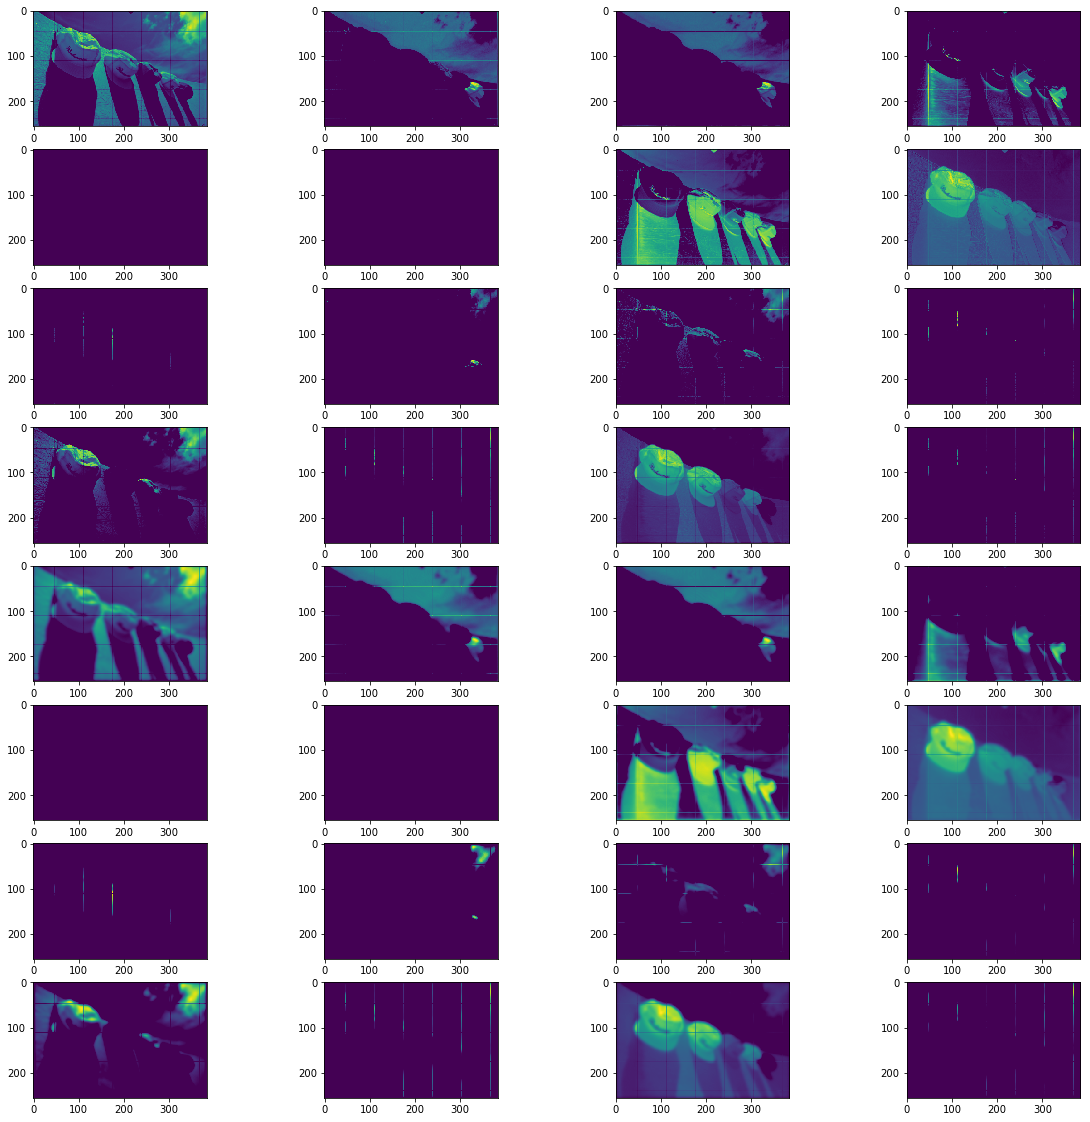

In [39]:
plt.figure(figsize=(20, 20))
n = 16
for i in range(n):
    vis_clean = utils.visualize(clean_layer[:,:,:,i], [16, 16], [0, 0], [Nr, Nc], color=0)
    vis_dist = utils.visualize(dist_layer[:,:,:,i], [16, 16], [0, 0], [Nr, Nc], color=0)
    plt.subplot(8, 4, i+1), plt.imshow(vis_clean)
    plt.subplot(8, 4, i+n+1), plt.imshow(vis_dist)
plt.show()

In [25]:
clean_layer[0].shape

(384, 16, 16, 16)

In [6]:
os.mkdir("results/gblur")
datadir = '/data2/rajeev/dA_IQA/data/LIVE/gblur/'

OSError: [Errno 17] File exists: 'results/gblur'

In [7]:
# Collecting all the AWGN files
datadir = '/data2/rajeev/dA_IQA/data/LIVE/gblur/'
files = [f for f in listdir(datadir) if isfile(join(datadir, f))]

(512, 768, 3)


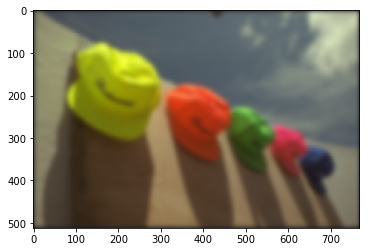

In [39]:
vis_Ir = utils.image_recon(I.shape, P)
print vis_Ir.shape
plt.imshow(vis_Ir)
plt.show()

(512, 768, 3)
(384, 32, 32, 3)


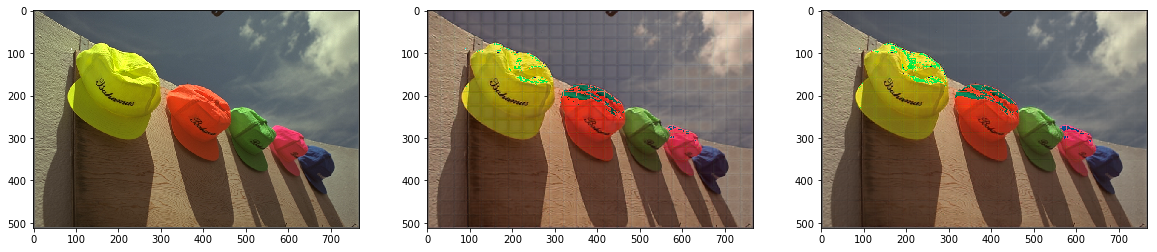

In [12]:
# img 162, 42, 36, 132
% matplotlib inline
f = datadir + 'img' + str(163) + '.bmp'
I = mpimg.imread(f)
print I.shape
P = utils.getPatchesDict(I, psize=[32, 32], noPatches=4000, entropy_th=1.0, stride=[32, 32])
print P.shape
decoded_imgs = autoencoder.predict([P, P])
vis_clean = utils.image_recon(I.shape, decoded_imgs[0])
vis_dist = utils.image_recon(I.shape, decoded_imgs[1])
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.imshow(I)
plt.subplot(1, 3, 2)
plt.imshow(vis_clean)
plt.subplot(1, 3, 3)
plt.imshow(vis_dist)
plt.show()

In [14]:
dist_mats = get_dist_hidden([P])[0]
print dist_mats.shape
scores = np.linalg.norm(dist_mats.reshape((dist_mats.shape[0], np.prod(dist_mats.shape[1:]))), axis=1)
print np.mean(scores)

(384, 8, 8, 32)
20.0429


In [16]:
######## Score Calculation ########
scores = np.zeros(174)
for i in range(174):
    f = datadir + 'img' + str(i+1) + '.bmp'
    I = mpimg.imread(f)
    P = utils.getPatchesDict(I, psize=[32, 32], noPatches=4000, entropy_th=3.0, stride=[32, 32])
    dist_hidden = get_dist_hidden([P])[0]
    distortion = dist_hidden.reshape((dist_hidden.shape[0], np.prod(dist_hidden.shape[1:])))
    score = np.mean(np.linalg.norm(distortion, axis=1))
    scores[i] = score
    
    if (i+1)%30 == 0:
        string = str(i+1) + '/174' + 'images done!'
        print string
    elif i + 1 == 174:
        string = str(i+1) + '/174' + 'images done!'
        print string

scipy.io.savemat('results/gblur/QualityScores.mat', mdict = {'scores': scores})

30/174images done!
60/174images done!
90/174images done!
120/174images done!
150/174images done!
174/174images done!


In [17]:
####### Correlation Calculation ######
data = scipy.io.loadmat('../../data/LIVE/dmos.mat')
dmos = data["dmos"]
orgs = data["orgs"]
# GBLUR values
dmos = dmos[:, 634 : 808]
orgs = orgs[:, 634 : 808]

data = scipy.io.loadmat('results/gblur/QualityScores.mat')
scores = data["scores"]

distIndcs = np.where(orgs == 0)[1]
dmos = dmos[:, distIndcs]
scores = scores[:, distIndcs]

rho, pval = scipy.stats.spearmanr(scores[0, :], dmos[0, :])
scipy.io.savemat('results/gblur/CorrScores.mat', mdict = {'SROCC': rho})

string = 'Correlation Score = ' + str(rho)
print string

Correlation Score = -0.283837190994


In [18]:
dmos.shape, scores.shape

((1, 145), (1, 145))

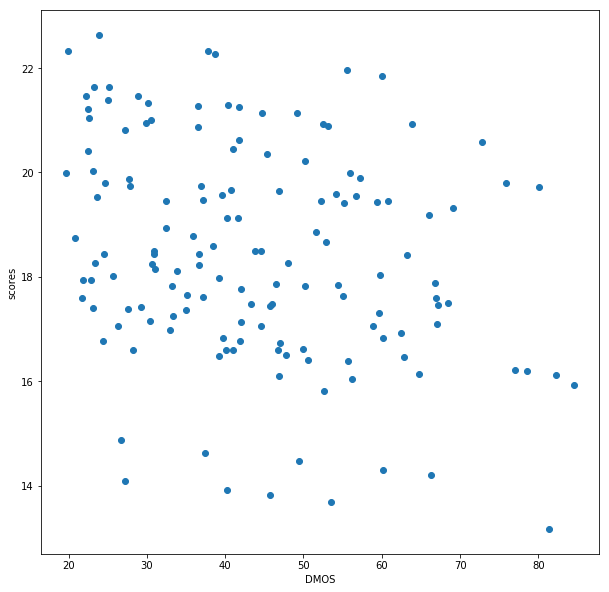

In [19]:
plt.switch_backend('agg')
plt.figure(figsize=(10, 10))
plt.scatter(dmos, scores)
plt.xlabel('DMOS')
plt.ylabel('scores')
plt.show()
plt.savefig('results/gblur/scatter.png')